<a href="https://colab.research.google.com/github/LANCARI/MOD-711-Machine-Learning/blob/main/Clustering_Mean_Shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOD-711 MACHINE LEARNING (Grupo A Clustering)

Clustering - Mean Shift

Integrantes:

Frida Aduviri

Licett Ancari



## 1. Descripción

La agrupación por cambio medio tiene como objetivo descubrir "manchas" en una densidad suave de muestras. Es un algoritmo basado en centroides, que funciona actualizando los candidatos para centroides para que sean la media de los puntos dentro de una región determinada. Luego, estos candidatos se filtran en una etapa de posprocesamiento para eliminar casi duplicados y formar el conjunto final de centroides.

## 2. Birtex y Referencias:

* @article{derpanis2005mean,
  title={Mean shift clustering},
  author={Derpanis, Konstantinos G},
  journal={Lecture Notes},
  volume={32},
  pages={1--4},
  year={2005}
}

* MDPI and ACS Style
Liu, Z.; Liu, J.; Xiao, X.; Yuan, H.; Li, X.; Chang, J.; Zheng, C. Segmentation of White Blood Cells through Nucleus Mark Watershed Operations and Mean Shift Clustering. Sensors 2015, 15, 22561-22586. https://doi.org/10.3390/s150922561

* AMA Style
Liu Z, Liu J, Xiao X, Yuan H, Li X, Chang J, Zheng C. Segmentation of White Blood Cells through Nucleus Mark Watershed Operations and Mean Shift Clustering. Sensors. 2015; 15(9):22561-22586. https://doi.org/10.3390/s150922561

* Chicago/Turabian Style
Liu, Zhi, Jing Liu, Xiaoyan Xiao, Hui Yuan, Xiaomei Li, Jun Chang, and Chengyun Zheng. 2015. "Segmentation of White Blood Cells through Nucleus Mark Watershed Operations and Mean Shift Clustering" Sensors 15, no. 9: 22561-22586. https://doi.org/10.3390/s150922561

## 3. Tipo de Modelo:

Método de Aprendizaje: No supervisado.

Por Parámetro: No paramétrico

Datos de Aprendizaje: Funciona en un enfoque "offline" lo que significa que opera en un conjunto de datos fijo y no se adapta a nuevos datos que llegan de manera continua.

Resultado del Entrenamiento: Ealgoritmo de Clustering Jerárquico no es un "modelo" ya que el resultado es una estructura jerárquica de clústeres que puede representarse visualmente a través de un dendrograma.

## 4. Algoritmos de Entrenamiento:
* Technological Background
* Different Color Spaces
* Illumination Intensity Adjustment
* Mean Shift Clustering
* Watershed Transformation


## 5. Supuestos y Restricciones:

#Supuestos:

1. Forma no paramétrica de los clústeres: A diferencia de algunos algoritmos de clustering que asumen una forma específica para los clústeres, el Mean Shift se considera no paramétrico en términos de la forma de los clústeres. Esto significa que no hace suposiciones específicas sobre la forma de los clústeres y puede detectar clústeres con formas arbitrarias.

2. Distribución de densidad: El algoritmo Mean Shift asume que los clústeres están asociados con modos de alta densidad en el espacio de características. Esto significa que tiende a encontrar clústeres donde los puntos de datos están agrupados densamente y donde hay áreas de baja densidad entre los clústeres.

#Restricciones:

1. Sensibilidad al parámetro de ancho de banda (bandwidth): El rendimiento del algoritmo Mean Shift puede depender en gran medida del valor del parámetro de ancho de banda. La elección de este parámetro puede ser crítica para obtener resultados significativos. Un ancho de banda demasiado grande puede conducir a la fusión de clústeres, mientras que un ancho de banda demasiado pequeño puede resultar en la identificación de detalles intrínsecos como clústeres separados.

2. Costo computacional: El Mean Shift puede ser computacionalmente costoso, especialmente en conjuntos de datos grandes o con un ancho de banda grande, ya que implica un cálculo intensivo de distancias entre puntos de datos.

3. Número de clústeres no predeterminado: A diferencia de algunos algoritmos de clustering que requieren que el usuario especifique previamente el número de clústeres, el Mean Shift no tiene esta restricción. Sin embargo, el usuario aún puede influir en el número de clústeres a través de la elección del parámetro de ancho de banda.

4. Sensibilidad a la inicialización: Al igual que con muchos algoritmos de clustering, la elección de los puntos iniciales (semillas) para iniciar el proceso Mean Shift puede afectar el resultado final.

5. Tamaño y forma de los clústeres: El Mean Shift puede tener dificultades para identificar clústeres que tienen formas muy alargadas o cuando los clústeres tienen densidades variables en diferentes regiones.

Data Set: Customers.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/customers.csv')
df.sample(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
131,132,Male,39,71,75
69,70,Female,32,48,47


In [ ]:
#X = df.iloc[:, [2,3]].values (2d)
X = df.iloc[:, [2,3,4]].values

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans

In [ ]:
ms = MeanShift(bandwidth=22)
y_ms = ms.fit_predict(X)

In [ ]:
kmean = KMeans(n_clusters=5,)
y_kmeans = kmean.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

#Comparison between meanshift and Kmeans

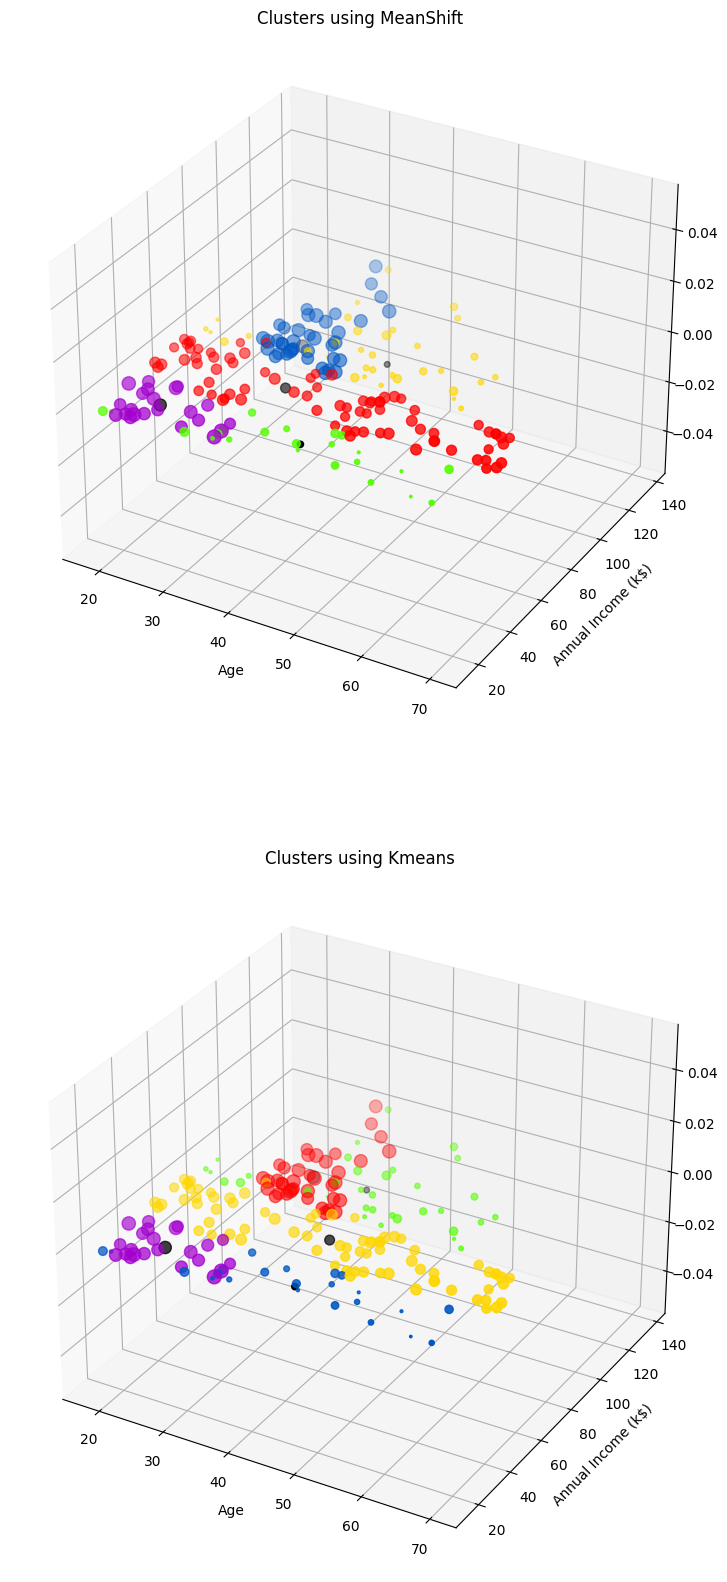

In [ ]:
fig = plt.figure(figsize=(14, 20))

#plt.subplot(121) (for 2d)
plt.subplot(211, projection='3d')
plt.scatter(X[:, 0], X[:, 1],X[:,2], c=y_ms, cmap='prism')
centers = ms.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],centers[:,2], c='black')
plt.title('Clusters using MeanShift')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

#plt.subplot(122) (for 2d)
plt.subplot(212, projection='3d')
plt.scatter(X[:, 0], X[:, 1],X[:,2], c=y_kmeans, cmap='prism')
centers = kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], centers[:,2], c='black')
plt.xlabel('Age')
plt.title('Clusters using Kmeans')
plt.ylabel('Annual Income (k$)')
plt.show()